In [1]:
import pandas as pd

In [2]:
payment_data = pd.read_csv('data-science-complete-tutorial/Data/payments-data.csv')

/home/awantik/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (4,24,35,36,37,40,42,43,53,54,55,56,57,58,59,60,61,62,63,64,65,66,68,69,70,71) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
columns = payment_data.columns.tolist()

### Look for a column in large data

In [7]:
list(filter(lambda w:w.startswith('Date'), columns))

['Date_of_Payment']

In [21]:
list(filter(lambda w:'Payment' in w, columns))

['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID',
 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name',
 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State',
 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country',
 'Total_Amount_of_Payment_USDollars',
 'Date_of_Payment',
 'Number_of_Payments_Included_in_Total_Amount',
 'Form_of_Payment_or_Transfer_of_Value',
 'Nature_of_Payment_or_Transfer_of_Value',
 'Third_Party_Payment_Recipient_Indicator',
 'Name_of_Third_Party_Entity_Receiving_Payment_or_Transfer_of_Value',
 'Payment_Publication_Date']

### Identify column type for data with large number of columns

In [10]:
payment_data.Date_of_Payment.dtype

dtype('O')

### Data not in right format for use datetime ops to change it

In [11]:
payment_data['Date_of_Payment_Fmt'] = pd.to_datetime(payment_data.Date_of_Payment)

In [12]:
payment_data['Date_of_Payment_Fmt'].dtype

dtype('<M8[ns]')

In [13]:
payment_data[['Date_of_Payment_Fmt']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 1 columns):
Date_of_Payment_Fmt    29999 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 234.5 KB


In [23]:
payment_data[payment_data.Date_of_Payment_Fmt == '2016-02-13']['Total_Amount_of_Payment_USDollars']

1          23.45
2          32.00
8          16.14
96         75.60
99         56.17
100        51.29
134        64.20
135        38.51
177       121.00
237        64.70
382         7.98
387        42.50
403        31.66
467        60.00
471         5.42
521        97.00
525         7.74
735       136.81
738         6.00
739         5.12
7528       10.51
7565       10.51
7566       10.51
7567       10.51
10090      10.77
10484      11.34
11206      10.32
11207      11.04
12135      15.60
12499      12.05
12536      12.05
12537       9.90
12959      21.45
12960      14.33
14443      16.30
14480      16.30
14481      16.30
22046      17.54
22699      17.09
23344      21.98
23633      15.86
23835      10.44
23836      10.44
25723      11.35
25724      11.34
25740    5653.22
Name: Total_Amount_of_Payment_USDollars, dtype: float64

### Total amount of payment that happened on a specific date

In [25]:
day_wise_payment = payment_data.groupby(['Date_of_Payment_Fmt'])['Total_Amount_of_Payment_USDollars'].sum()

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

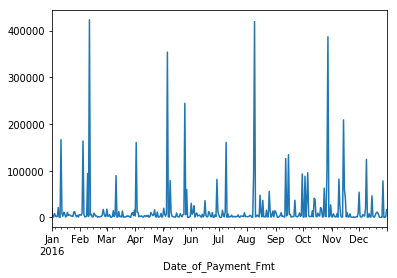

In [28]:
day_wise_payment.plot()

### Understanding customer churn
* For a company ABC, there are many resgitered customers who once used their products.
* Customers who once were your are not anymore is known as customer churn

In [32]:
customer_churn_data = pd.read_csv('data-science-complete-tutorial/Data/churn.csv.txt', parse_dates=['signup_date','last_trip_date'])

In [33]:
customer_churn_data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


### Questions
1. transfrom the date columns into datetime object
    - Using parse_dates, you can do it during loading itself
2. identify num of days the person have used the product
3. Do the timewise plotting. Show distribution of user signup by date

In [34]:
customer_churn_data.dtypes

avg_dist                         float64
avg_rating_by_driver             float64
avg_rating_of_driver             float64
avg_surge                        float64
city                              object
last_trip_date            datetime64[ns]
phone                             object
signup_date               datetime64[ns]
surge_pct                        float64
trips_in_first_30_days             int64
luxury_car_user                     bool
weekday_pct                      float64
dtype: object

In [36]:
customer_churn_data['total_usage_days'] = customer_churn_data.last_trip_date - customer_churn_data.signup_date

In [38]:
customer_churn_data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,total_usage_days
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,143 days
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,96 days
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,1 days
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,170 days
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,47 days


In [40]:
customer_churn_data.groupby(['signup_date'])['avg_dist'].count()

signup_date
2014-01-01    1737
2014-01-02    1004
2014-01-03    1213
2014-01-04    1485
2014-01-05    1343
2014-01-06    1763
2014-01-07    1486
2014-01-08    1275
2014-01-09    1433
2014-01-10    2021
2014-01-11    2402
2014-01-12    1334
2014-01-13    1049
2014-01-14    1120
2014-01-15    1110
2014-01-16    1431
2014-01-17    2149
2014-01-18    2948
2014-01-19    2028
2014-01-20    1295
2014-01-21    1234
2014-01-22    1369
2014-01-23    1606
2014-01-24    2284
2014-01-25    2885
2014-01-26    1708
2014-01-27    1236
2014-01-28    1284
2014-01-29    1197
2014-01-30    1471
2014-01-31    2100
Name: avg_dist, dtype: int64

In [42]:
res = customer_churn_data['signup_date'].value_counts()

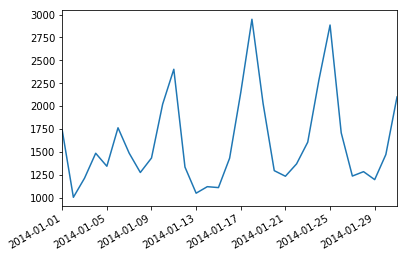

In [44]:
res.plot()

In [46]:
res.nlargest(5)

2014-01-18    2948
2014-01-25    2885
2014-01-11    2402
2014-01-24    2284
2014-01-17    2149
Name: signup_date, dtype: int64

### Find day of the week for most registration

In [49]:
pd.datetime.weekday(pd.to_datetime('2014-01-18'))

5

In [56]:
pd.Timestamp('2014-01-18').day_name()

'Saturday'

In [53]:
customer_churn_data = pd.read_csv('data-science-complete-tutorial/Data/churn.csv.txt')

In [58]:
customer_churn_data['day_of_week'] = customer_churn_data.signup_date.map(lambda d: pd.Timestamp(d).day_name())

In [59]:
customer_churn_data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,day_of_week
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,Saturday
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,Wednesday
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,Monday
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,Friday
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,Monday


In [61]:
customer_churn_data['day_of_week'].value_counts()

Friday       9767
Saturday     9720
Thursday     6945
Wednesday    6688
Sunday       6413
Monday       5343
Tuesday      5124
Name: day_of_week, dtype: int64

## Identify the weekday for most of the payment

In [63]:
payments_data = payment_data
payments_data["day-of-week"] = payments_data.Date_of_Payment.map(lambda x: pd.Timestamp(x).day_name()) 
payments_data["day-of-week"].value_counts().nlargest(3) 

Friday     8523
Monday     4655
Tuesday    4116
Name: day-of-week, dtype: int64

In [66]:
payments_data.groupby(["day-of-week"])['Total_Amount_of_Payment_USDollars'].sum()

day-of-week
Friday       1459751.37
Monday       1172790.41
Saturday      430003.87
Sunday         74520.40
Thursday     1451403.41
Tuesday       896716.93
Wednesday     679049.55
Name: Total_Amount_of_Payment_USDollars, dtype: float64

### Identify the distribution of loyal customer from customer churn information

In [68]:
customer_churn_data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,day_of_week
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,Saturday
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,Wednesday
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,Monday
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,Friday
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,Monday


In [2]:
customer_churn_data = pd.read_csv('data-science-complete-tutorial/Data/churn.csv.txt', parse_dates=['signup_date','last_trip_date'])

In [3]:
customer_churn_data['total_usage_days'] = customer_churn_data.last_trip_date - customer_churn_data.signup_date

In [4]:
customer_churn_data.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,total_usage_days
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084,92 days 18:57:44.640000
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503,62 days 03:06:56.580842
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0 days 00:00:00
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000,27 days 00:00:00
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000,110 days 00:00:00
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000,150 days 00:00:00
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000,181 days 00:00:00


### Assignment : Bucketize customers for targetting marketing

In [5]:
import datetime

In [8]:
#Assign Bronze
customer_churn_data[customer_churn_data.total_usage_days < datetime.timedelta(27,0,0)].head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,total_usage_days
2,0.77,5.0,4.3,1.0,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,1 days
6,3.95,4.0,NaN,1.0,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0,1 days
7,2.04,5.0,5.0,1.0,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0,1 days
8,4.36,5.0,4.5,1.0,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0,11 days
9,2.37,5.0,NaN,1.0,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0,2 days


In [9]:
#Assign Silver
customer_churn_data[(customer_churn_data.total_usage_days > datetime.timedelta(27,0,0)) & (customer_churn_data.total_usage_days < datetime.timedelta(110,0,0))].head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,total_usage_days
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,96 days
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,47 days
12,20.29,5.0,NaN,1.00,Winterfell,2014-03-12,iPhone,2014-01-15,0.0,1,False,100.0,56 days
20,2.53,3.0,NaN,1.00,Winterfell,2014-03-16,Android,2014-01-31,0.0,1,False,50.0,44 days
22,11.47,5.0,NaN,1.00,Winterfell,2014-05-02,iPhone,2014-01-24,0.0,0,False,100.0,98 days


In [16]:
customer_churn_data['category'] = None

In [27]:
def f(d):
    if d > datetime.timedelta(27,0,0):
        return 'Bronze'
    else:
        return None
    
customer_churn_data['category']= customer_churn_data.total_usage_days.map(f)